In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data1 =pd.read_csv(r'./data/data_1.csv')
data2 =pd.read_csv(r'./data/data_2.csv')

In [4]:
data1.head()

,x,y
0,0,-71.218000
1,2,-34.769000
2,4,-55.372129
3,6,-38.338387
4,8,-62.190773


In [5]:
data2.head()

,x,y
0,0,-61.422000
1,2,-42.287000
2,4,-58.976129
3,6,-31.453387
4,8,-28.412773


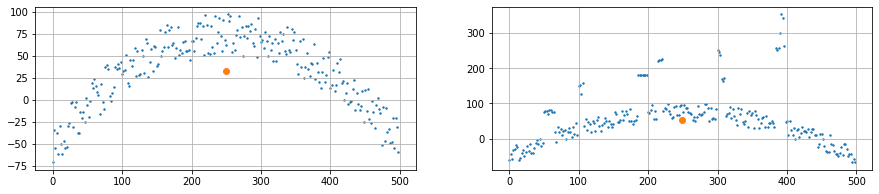

In [6]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.scatter(data1['x'],data1['y'],s=2)
plt.scatter(sum(data1['x'])/len(data1['x']),sum(data1['y'])/len(data1['y']))
plt.grid()
plt.subplot(1,2,2)
plt.scatter(data2['x'],data2['y'],s=2)
plt.scatter(sum(data2['x'])/len(data2['x']),sum(data2['y'])/len(data2['y']))
plt.grid()
plt.show()

In [41]:
data1['x2'] = data1['x']**2
data1['x3'] = data1['x']**3
data1['x4'] = data1['x']**4
data1['xy'] = data1['x']*data1['y']
data1['x2y'] = data1['x']**2*data1['y']

In [49]:
data1.head()

,x,y,x2,x3,x4,xy,x2y
0,0,-71.218000,0,0,0,-0.000000,-0.000000
1,2,-34.769000,4,8,16,-69.538000,-139.076001
2,4,-55.372129,16,64,256,-221.488516,-885.954064
3,6,-38.338387,36,216,1296,-230.030320,-1380.181921
4,8,-62.190773,64,512,4096,-497.526185,-3980.209482


In [33]:
def ls_curve(data):
    data['x2'] = data['x']**2
    data['x3'] = data['x']**3
    data['x4'] = data['x']**4
    data['xy'] = data['x']*data1['y']
    data['x2y'] = data['x']**2*data['y']
    
    A = np.array(
    [
        [sum(data['x4']),sum(data['x3']),sum(data['x2'])],
        [sum(data['x3']),sum(data['x2']),sum(data['x'])],
        [sum(data['x2']),sum(data['x']),len(data)]
    ])

    B = np.array(
        [
            [sum(data['x2y'])],
            [sum(data['xy'])],
            [sum(data['y'])]
        ]
    )

    X = (np.linalg.inv(A).dot(B))
    return X

def tls_curve(data):
    A = [data['x']**2,data['x'],[1]*len(data)]
    A = np.array(A).T
    B = data['y']
    B = np.array(B).T
#     print(np.linalg.inv(A.T.dot(A)))
    
    X = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(B))
    
    return X

In [34]:
tls_curve(data1)

array([-2.00907296e-03,  1.00597883e+00, -5.18388349e+01])

In [58]:
def visualize(data, offset=10,figsize=(15,9), f = ls_curve):
    X = ls_curve(data)
    fitted_x =  np.linspace(min(data['x']),max(data['x']), 100)
    fitted_y = np.array(list(X[0]*i**2+X[1]*i+X[2] for i in fitted_x))
    fitted_y1 = np.array(list(X[0]*i**2+X[1]*i+X[2]+offset for i in fitted_x))
    fitted_y2 = np.array(list(X[0]*i**2+X[1]*i+X[2]-offset for i in fitted_x))

    plt.figure(figsize=figsize)

    plt.scatter(data['x'],data['y'],s=2)
    plt.scatter(sum(data['x'])/len(data['x']),sum(data['y'])/len(data['y']))
    plt.plot(fitted_x,fitted_y, 'k',)
#     plt.plot(fitted_x,fitted_y1,':')
#     plt.plot(fitted_x,fitted_y2,':')
    X = tls_curve(data)
    fitted_x =  np.linspace(min(data['x']),max(data['x']), 100)
    fitted_y = np.array(list(X[0]*i**2+X[1]*i+X[2] for i in fitted_x))
#     fitted_y1 = np.array(list(X[0]*i**2+X[1]*i+X[2]+offset for i in fitted_x))
#     fitted_y2 = np.array(list(X[0]*i**2+X[1]*i+X[2]-offset for i in fitted_x))

#     plt.figure(figsize=figsize)
    plt.plot(fitted_x,fitted_y, 'k',)
    plt.grid()
    plt.show()

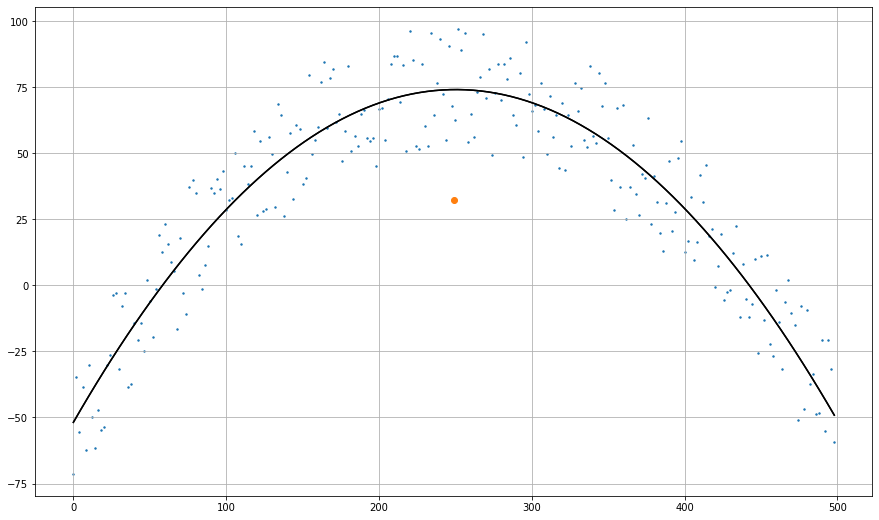

Wall time: 984 ms


In [59]:
%%time
visualize(data1,figsize=(15,9), f=tls_curve)
# visualize(data2,offset=20,figsize=(15,9))

In [46]:
def fit3points(points):
    
    assert len(points)==3
    A = np.array(
    [
        [points[0][0]**2,points[0][0],1],
        [points[1][0]**2,points[1][0],1],
        [points[2][0]**2,points[2][0],1],
        
    ])

    B = np.array(
        [
            [points[0][1]],
            [points[1][1]],
            [points[2][1]],
        ]
    )

    try:
        X = np.matmul(np.linalg.inv(A),B).flatten()
    except:
        X= np.array([0,0,0])
    return X

def inregion(point, curve,offset=10):
    
    assert len(curve)==3
    assert len(point)==2
    
    if abs(curve[0]*point[0]**2+curve[1]*point[0]+curve[2]-point[1])<=offset:
        return True
    return False

def ransac(points,offset=10, rounds= 100):
    
    try:
        assert type(point) == np.array
    except:
        points= np.array(points)
    
    curve = [[0,0,0]]
    prevper = 0
    for _ in range(rounds):
        
        point3 = np.zeros((3,2))
        point3[0] = points[np.random.randint(1,len(points))]
        point3[1] = points[np.random.randint(1,len(points))]
        point3[2] = points[np.random.randint(1,len(points))]

        point3 = np.array(point3)
        
#         print(point3)
        assert point3.shape==(3,2)
        cur_curve = fit3points(point3)
        count=0
        for i in points:
            if inregion(i,cur_curve, offset=offset):
                count+=1
        curper = count/len(points)
        
        
        if curper>prevper:

            prevper=curper
            curve.append(cur_curve)
    print(prevper)
    return curve[-1]

def visualize_ransac(data, offset=10, figsize=(15,9), rounds=1000):
    points = [data['x'],data['y']]
    points= np.array(points).T
    
    X = ransac(points, offset=offset, rounds=rounds)
    
    print("The parameters:",X)
    fitted_x =  np.linspace(min(data['x']),max(data['x']), 100)
    fitted_y = np.array(list(X[0]*i**2+X[1]*i+X[2] for i in fitted_x))
    fitted_y1 = np.array(list(X[0]*i**2+X[1]*i+X[2]+offset for i in fitted_x))
    fitted_y2 = np.array(list(X[0]*i**2+X[1]*i+X[2]-offset for i in fitted_x))
    
    
#     point3 = [points[0],points[125],points[-1]]

    plt.figure(figsize=figsize)
    

    plt.scatter(data['x'],data['y'],s=2)
    plt.scatter(sum(data['x'])/len(data['x']),sum(data['y'])/len(data['y']))
    plt.plot(fitted_x,fitted_y, 'k',)
    plt.plot(fitted_x,fitted_y1,':')
    plt.plot(fitted_x,fitted_y2,':')

    plt.grid()
    plt.show()

0.632
The parameters: [-2.22495520e-03  1.10596488e+00 -6.27491174e+01]


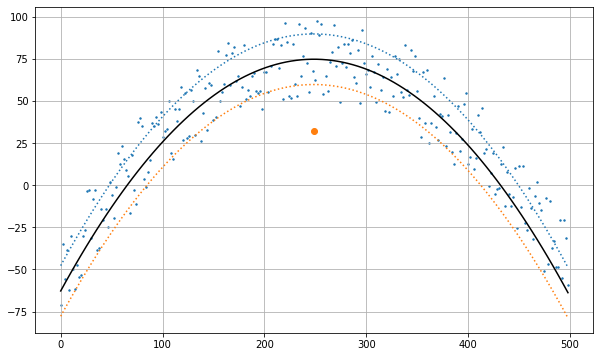

0.54
The parameters: [-1.75327875e-03  9.13882978e-01 -4.93561441e+01]


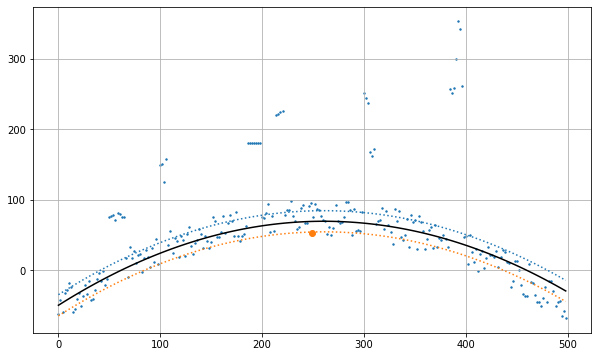

In [47]:
visualize_ransac(data1, offset=15, rounds=1000, figsize=(10,6))
visualize_ransac(data2, offset=15, rounds=1000, figsize=(10,6))

In [32]:
import math
f = 0.015
d = 0.014
D = 20
Ddash = 1/(1/f-1/D)
s0 = 0.05

0.015011258443832873

In [96]:
def svd(A):
    U = A.dot(A.T)
    V = A.T.dot(A)

    eigval1, eigvec1 = np.linalg.eig(U)
#     print(eigval1,eigvec1)
    idx = eigval1.argsort()[::-1]
#     print(idx)
    eigval1 = eigval1[idx]
    eigvec1 = eigvec1[idx]    
    
    singular1 = np.diag(np.sqrt(eigval1))
    
    eigval2, eigvec2 = np.linalg.eig(V)
    
    idx = eigval2.argsort()[::-1]
    eigval2 = eigval2[idx]
    eigvec2 = eigvec2[:,idx] 
    print(eigval2)
    print(eigvec2.T)
    

    if A.shape[0]>A.shape[1]:
        new_rows = np.zeros((A.shape[0]-A.shape[1], A.shape[1]))
        singular1 = np.vstack([singular1,new_rows])
    else:
        new_cols=np.zeros((A.shape[0], A.shape[1]-A.shape[0]))
        singular1 = np.hstack([singular1,new_cols])

    return eigvec1, singular1, eigvec2

In [97]:
A = np.array(
    [[3,2,2],
    [2,3,-2]]
)

In [98]:
u,sigma,v = svd(A)

[2.50000000e+01 9.00000000e+00 3.61082692e-15]
[[-7.07106781e-01 -7.07106781e-01 -1.16614446e-17]
 [ 2.35702260e-01 -2.35702260e-01  9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


In [74]:
u.dot(sigma.dot(v.T))

array([[-3., -2., -2.],
       [-2., -3.,  2.]])